#**Week 8 - Case Study on Testing of Hypothesis**

> _A company started to invest in digital marketing as a new way of their product
promotions. For that they collected data and decided to carry out a study on it._

*  The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
*  The company needs to check whether there is any dependency between the
features “**Region**” and “**Manager**”.

_Help the company to carry out their study with the help of data provided._





######***Importing necessary libraries***

In [70]:
!pip install scipy --upgrade

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

In [72]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


######***Reading dataset Sales_add.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [73]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Sales_add.csv')
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


######***Finding the no: of Observations***

In [75]:
df.shape

(22, 5)

######***Checking for null values***

In [76]:
df[df.isna().any(axis=1)]

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)


##**Insights:**


*   The dataset contains the details of the Sales recorded before and after the introduction of the digital marketing in each month for different regions.
*   **22 Observations** and **5 Features** are found.
*   **No Null** values are recorded.
*  The datatype for the features - Sales_before_digital_add, Sales_after_digital_add are given as Integer datatype with 64-bit, whereas, the other features - Month, Region, Manager are given as Objects.
*   The Sales amount is in Dollars









######***Plotting a Pie-Chart for the feature - Region***

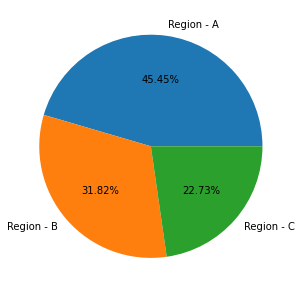

In [77]:
fig = plt.figure(figsize =(5, 7))
plt.pie(df['Region'].value_counts(), labels = df['Region'].unique(), autopct='%1.2f%%')
plt.show()

##**Insights**:


*   **45.45%** of the Sales records are from **Region A**
*   **31.82%** of the Sales records are from **Region B**
*   **22.73%** of the Sales records are from **Region C**
> _Most of the Sales are recorded from **Region - A**_

######***Plotting Lines for the features - Sales before & Sales after Digital Marketing for each Month***

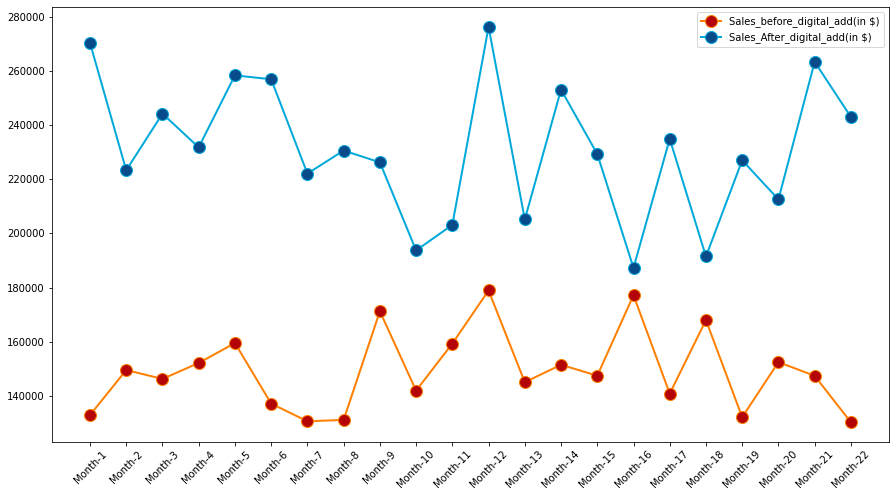

In [78]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45) 
plt.plot('Month', 'Sales_before_digital_add(in $)', data=df, marker='o', markerfacecolor='#B40404', markersize=12, color='#FF8000', linewidth=2)
plt.plot('Month', 'Sales_After_digital_add(in $)', data=df, marker='o', markerfacecolor='#084B8A', markersize=12, color='#01A9DB', linewidth=2)
plt.legend()
plt.show()

##**Insights:**


> _As visible from the above plot, we can see that, the Sales amount has increased after the introduction of Digital Marketing_



##**The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.**

######***Since the Sales are recorded high in Region - A, we are drawing a sample from the population, having the sales only from Region - A***

In [79]:
sample_df=df[(df['Region'] == 'Region - A')]
sample_df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
5,Month-6,Region - A,Manager - B,137163,256948
7,Month-8,Region - A,Manager - A,131140,230637
11,Month-12,Region - A,Manager - A,178939,276279
13,Month-14,Region - A,Manager - A,151514,253131
15,Month-16,Region - A,Manager - B,177195,187305
16,Month-17,Region - A,Manager - C,140862,234908
19,Month-20,Region - A,Manager - B,152493,212579
21,Month-22,Region - A,Manager - C,130263,243020


In [80]:
print('The no: of Observation for Region-A:',sample_df.shape[0])

The no: of Observation for Region-A: 10


> ***Examine data and checking assumptions***

> we need to do some statistics calculations like mean, minimum, maximum, standard deviation for both Sales_before_digital_add and Sales_after_digital_add.






In [81]:
sample_df[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,10.000000,10.000000
mean,148204.900000,238853.100000
std,17759.955752,27111.634372
min,130263.000000,187305.000000
25%,133981.500000,225159.750000
50%,145210.500000,238964.000000
75%,152248.250000,255993.750000
max,178939.000000,276279.000000


######***Finding Correlation using corr() and Plotting a heatmap***

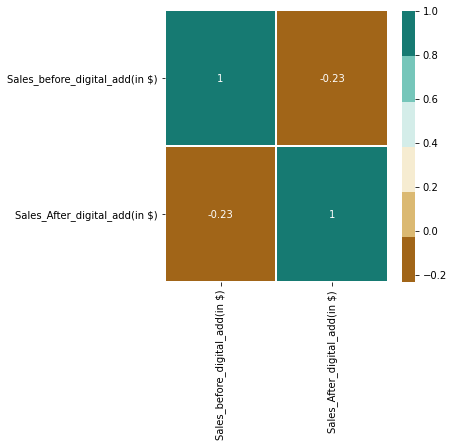

In [82]:
plt.subplots(figsize=(5,5))
colormap = sns.color_palette("BrBG")
sns.heatmap(sample_df[['Sales_before_digital_add(in $)', 'Sales_After_digital_add(in $)']].corr(), annot=True, linewidth=1, cmap=colormap)

##**Insights:**


> _As visible from the Heatmap, the features **Sales_before_digital_add** and **Sales_after_digital_add** have a **Low Negative Correlation** with value **-0.23**. Thus, there is **no dependency** between these features_



> ***Define Hypotheses***
*   The Null Hypothesis, ***H(0) - There is no increase in sales after stepping into digital marketing***
*   The Alternative Hypothesis, ***H(a) - There is an increase in sales after stepping into digital marketing***
*   Significance level = 5%
*   Here, we are doing **One Tailed T - Test**




In [83]:
ttest,pval = stats.ttest_ind(sample_df['Sales_After_digital_add(in $)'], sample_df['Sales_before_digital_add(in $)'], alternative='greater')
print('Test statistic is:',ttest)
print('P-value for One tailed test is:', pval)
if(pval<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

Test statistic is: 8.84443505792257
P-value for One tailed test is: 2.852614202962045e-08
We reject null hypothesis


##**Insights:**


> _Since the **P-Value is smaller than the level of significance** , we reject our Null Hypothesis. Thus, we conclude that - **There is an increase in sales after stepping into digital marketing**_



######***Plotting a kde plot for the features Sales_before_digital_add and Sales_after_digital_add for the Region - A***

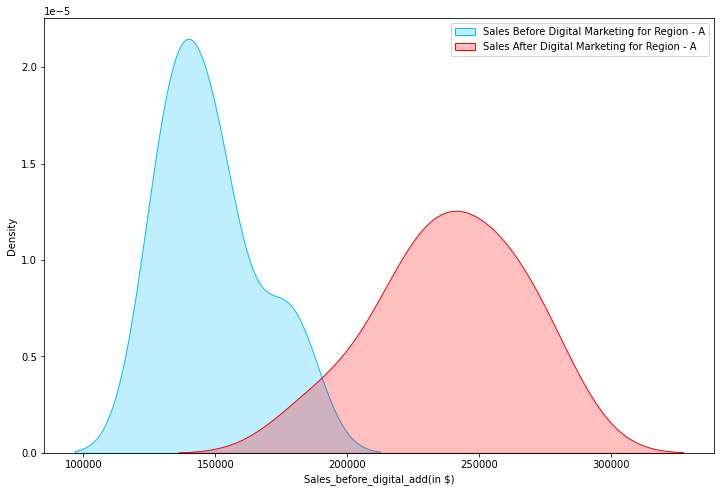

In [84]:
plt.figure(figsize=(12, 8))
sns.kdeplot(sample_df['Sales_before_digital_add(in $)'], label="Sales Before Digital Marketing for Region - A", shade = True, color = '#00BFFF')
sns.kdeplot(sample_df['Sales_After_digital_add(in $)'], label="Sales After Digital Marketing for Region - A", shade = True, color = '#FF0000')
plt.legend();

##**The company needs to check whether there is any dependency between the features “Region” and “Manager”.**

> ***Define Hypotheses***
*   The Null Hypothesis, ***H(0) - There is no dependency between the features Region and Manager***
*   The Alternative Hypothesis, ***H(a) - There is a significant dependency between the features Region and Manager***
*   Significance level = 5%
*   Since the features - Region and Manager are Categorical, we are doing **Chi-Square statistical hypothesis** to test their dependency

In [85]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['Region'], df['Manager']))
print("The Test Statistics is:",stat)
print("The P-value is:",p)
print("The Degree of Freedom is:",dof)
print("The Expected frequencies are \n:",expected)
if p <= 0.05:
    print('Dependent. Reject H(0)')
else:
    print('Independent. Accept H(0)')

The Test Statistics is: 3.050566893424036
The P-value is: 0.5493991051158094
The Degree of Freedom is: 4
The Expected frequencies are 
: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]
Independent. Accept H(0)


##**Insights:**


> _Since the **P-value is greater than the significance level**, we accept our Null Hypothesis. Thus, we conclude that - **There is no dependency between the features Region and Manager**_

